# **PRUEBA: ANÁLISIS ESTADÍSTICO CON PYTHON**
### **Módulo 4: Análisis Estadístico con Python**
#### *Carrera Data Science - G-93 - Desafio Latam*
#### Estudiante: Felipe Leal Arancibia

En esta prueba validaremos los conocimientos adquiridos durante este módulo..

Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos.

Tiempo asociado: 2 horas cronológicas

## Descripción

#### La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido a enfermedades cardíacas, producidas en su gran mayoría por enfermedades cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes de alto riesgo y reducir las complicaciones.


#### La base de datos cardio.csv contiene mediciones realizadas a pacientes hace 10 años, entre los cuales se encuentran:

##### ● Sex: M - F
##### ● Age: edad
##### ● Education: codificada, considerando que un valor más alto corresponde a un mayor nivel educativo.
##### ● currentSmoker: si el paciente es o no fumador actual
##### ● cigsPerDay: el número de cigarrillos que la persona fumaba en promedio en un día.
##### ● BPMeds: si el paciente estaba tomando medicamentos para la presión arterial (0: No, 1: Sí)
##### ● prevalenStroke: si el paciente había tenido un accidente cerebrovascular previamente (0: No, 1: Sí)
##### ● prevalentHyp:: si el paciente era hipertenso o no (0: No, 1: Sí)
##### ● diabetes: si el paciente tenía diabetes o no (0: No, 1: Sí)
##### ● totChol: nivel de colesterol total
##### ● sysBP: presión arterial sistólica
##### ● diaBP_BMI: presión arterial diastólica
##### ● BMI: Índice de masa corporal
##### ● heartRate: : ritmo cardíaco
##### ● glucose: nivel de glucosa
##### ● TenYearCHD: se indica si el paciente sufrió o no una enfermedad coronaria en los últimos 10 años.(0: No, 1: Sí)

#### A partir de estos datos, buscaremos realizar algunas descripciones predictivos.

In [2]:
# Primero importar todas las potenciales librería sa utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, skew
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE


#### 1. Carga los datos y explóralos. Elimina los datos nulos o incorrectos

In [3]:
# Cargar los datos
df = pd.read_csv('cardio.csv')

# Explorar los datos
print(df.head())
print(df.info())
print(df.describe())

# Eliminar datos nulos
df = df.dropna()

# Eliminar datos incorrectos (por ejemplo, valores negativos en columnas que no deberían tenerlos)
df = df[(df['Age'] > 0) & (df['cigsPerDay'] >= 0) & (df['totChol'] > 0) & (df['sysBP'] > 0) & (df['diaBP_BMI'] > 0) & (df['BMI'] > 0) & (df['heartRate'] > 0) & (df['glucose'] > 0)]

# Verificar nuevamente la información del dataframe
print(df.info())
print(df.describe())

  sex  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   M   39        4.0            No         0.0     0.0                0   
1   F   46        2.0            No         0.0     0.0                0   
2   M   48        1.0           Yes        20.0     0.0                0   
3   F   61        3.0           Yes        30.0     0.0                0   
4   F   46        3.0           Yes        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3   

KeyError: 'Age'

#### 2. Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas, utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?

               age      totChol          BMI
count  3656.000000  3656.000000  3656.000000
mean     49.557440   236.873085    25.784185
std       8.561133    44.096223     4.065913
min      32.000000   113.000000    15.540000
25%      42.000000   206.000000    23.080000
50%      49.000000   234.000000    25.380000
75%      56.000000   263.250000    28.040000
max      70.000000   600.000000    56.800000


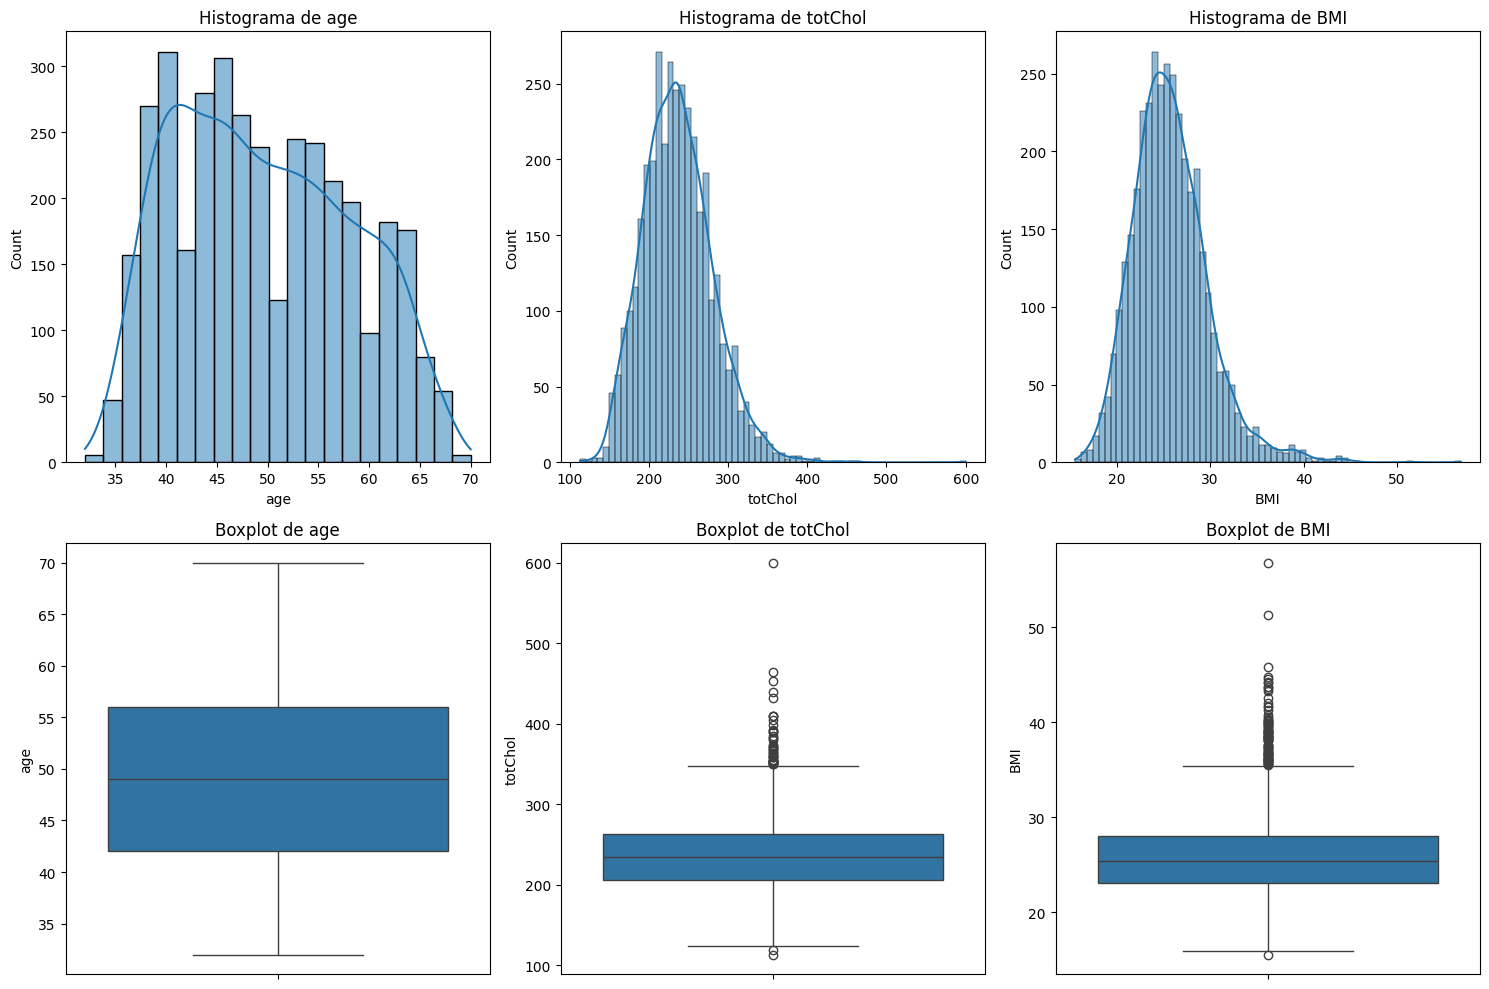

Dispersión (Coeficiente de variación):
age        0.172752
totChol    0.186160
BMI        0.157690
dtype: float64


In [4]:
# Seleccionar las tres variables cuantitativas
variables = ['age', 'totChol', 'BMI']

# Calcular indicadores estadísticos
descriptive_stats = df[variables].describe()
print(descriptive_stats)

# Graficar histogramas y boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, var in enumerate(variables):
    sns.histplot(df[var], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Histograma de {var}')
    
    sns.boxplot(y=df[var], ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

# Calcular la dispersión (coeficiente de variación)
dispersion = descriptive_stats.loc['std'] / descriptive_stats.loc['mean']
print("Dispersión (Coeficiente de variación):")
print(dispersion)

#### 3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el dataset "limpio"


In [5]:
# Eliminar datos atípicos utilizando el rango intercuartílico (IQR)
Q1 = df[variables].quantile(0.25)
Q3 = df[variables].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los datos que no son atípicos
df_clean = df[~((df[variables] < (Q1 - 1.5 * IQR)) | (df[variables] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verificar la información del dataframe limpio
print(df_clean.info())
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3528 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3528 non-null   object 
 1   age              3528 non-null   int64  
 2   education        3528 non-null   float64
 3   currentSmoker    3528 non-null   object 
 4   cigsPerDay       3528 non-null   float64
 5   BPMeds           3528 non-null   float64
 6   prevalentStroke  3528 non-null   int64  
 7   prevalentHyp     3528 non-null   int64  
 8   diabetes         3528 non-null   int64  
 9   totChol          3528 non-null   float64
 10  sysBP            3528 non-null   float64
 11  diaBP            3528 non-null   float64
 12  BMI              3528 non-null   float64
 13  heartRate        3528 non-null   float64
 14  glucose          3528 non-null   float64
 15  TenYearCHD       3528 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 468.6+ KB
None
 

#### 4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.


In [7]:
# Calcular la matriz de correlación excluyendo las variables categóricas
correlation_matrix = df_clean.select_dtypes(include=[np.number]).corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Identificar las variables con mayor correlación
correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values(kind="quicksort", ascending=False)

# Filtrar las correlaciones más altas (excluyendo la diagonal de 1.0)
high_corr = sorted_pairs[(sorted_pairs < 1) & (sorted_pairs > 0.5)]
print("Pares de variables con mayor correlación:")
print(high_corr)

                      age  education  cigsPerDay    BPMeds  prevalentStroke  \
age              1.000000  -0.152712   -0.183288  0.128012         0.048762   
education       -0.152712   1.000000    0.012041 -0.005793        -0.026042   
cigsPerDay      -0.183288   0.012041    1.000000 -0.041978        -0.033383   
BPMeds           0.128012  -0.005793   -0.041978  1.000000         0.082365   
prevalentStroke  0.048762  -0.026042   -0.033383  0.082365         1.000000   
prevalentHyp     0.305764  -0.073137   -0.058738  0.258655         0.062344   
diabetes         0.100403  -0.032787   -0.031858  0.039797         0.013064   
totChol          0.275765  -0.011373   -0.029144  0.073146         0.013841   
sysBP            0.387366  -0.116789   -0.090130  0.263293         0.058454   
diaBP            0.209557  -0.047418   -0.051023  0.199110         0.054426   
BMI              0.133782  -0.111728   -0.076122  0.078233         0.009064   
heartRate       -0.010659  -0.061459    0.061243 -0.

#### 5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?


In [8]:
# Filtrar el dataset para obtener los pacientes que pertenecen al mayor cuartil de BMI
Q3_BMI = Q3['BMI']
patients_high_BMI = df_clean[df_clean['BMI'] > Q3_BMI]

# Calcular la proporción de hombres en este subconjunto
prob_hombre = patients_high_BMI['sex'].value_counts(normalize=True)['M']
print(f"La probabilidad de que un paciente sea hombre, dado que pertenece al mayor cuartil de BMI, es: {prob_hombre:.2f}")

La probabilidad de que un paciente sea hombre, dado que pertenece al mayor cuartil de BMI, es: 0.52


#### 6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.


In [ ]:
# Definir la media poblacional hipotética
mu = 75

# Calcular la media y desviación estándar de la muestra
sample_mean = df_clean['heartRate'].mean()
sample_std = df_clean['heartRate'].std()
n = df_clean['heartRate'].count()

# Calcular la estadística t
t_stat = (sample_mean - mu) / (sample_std / np.sqrt(n))

# Calcular el p-valor
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))

print(f"Estadística t: {t_stat}")
print(f"p-valor: {p_value}")

# Decisión basada en el p-valor
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. No es razonable afirmar que el ritmo cardíaco promedio es 75.")
else:
    print("No rechazamos la hipótesis nula. Es razonable afirmar que el ritmo cardíaco promedio es 75.")

In [ ]:
# Definir la media poblacional hipotética
mu = 75

# Calcular la media y desviación estándar de la muestra
sample_mean = df_clean['heartRate'].mean()
sample_std = df_clean['heartRate'].std()
n = df_clean['heartRate'].count()

# Calcular la estadística t
t_stat = (sample_mean - mu) / (sample_std / np.sqrt(n))

# Calcular el p-valor# Definir la media poblacional hipotética
mu = 75

# Calcular la media y desviación estándar de la muestra
sample_mean = df_clean['heartRate'].mean()
sample_std = df_clean['heartRate'].std()
n = df_clean['heartRate'].count()

# Calcular la estadística t
t_stat = (sample_mean - mu) / (sample_std / np.sqrt(n))

# Calcular el p-valor

In [ ]:
# Definir la media poblacional hipotética
mu = 75

# Calcular la media y desviación estándar de la muestra
sample_mean = df_clean['heartRate'].mean()
sample_std = df_clean['heartRate'].std()
n = df_clean['heartRate'].count()

# Calcular la estadística t
t_stat = (sample_mean - mu) / (sample_std / np.sqrt(n))

# Calcular el p-valor
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))

print(f"Estadística t: {t_stat}")
print(f"p-valor: {p_value}")

# Decisión basada en el p-valor
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. No es razonable afirmar que el ritmo cardíaco promedio es 75.")
else:
    print("No rechazamos la hipótesis nula. Es razonable afirmar que el ritmo cardíaco promedio es 75.")

#### 7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores? Explica.


In [9]:
# Filtrar los datos para obtener solo los pacientes fumadores
smokers = df_clean[df_clean['currentSmoker'] == 'Yes']

# Separar los datos en dos grupos: hombres y mujeres
male_smokers = smokers[smokers['sex'] == 'M']['cigsPerDay']
female_smokers = smokers[smokers['sex'] == 'F']['cigsPerDay']

# Calcular las medias y desviaciones estándar de ambos grupos
mean_male = male_smokers.mean()
mean_female = female_smokers.mean()
std_male = male_smokers.std()
std_female = female_smokers.std()

# Realizar la prueba t de dos muestras
t_stat, p_value = stats.ttest_ind(male_smokers, female_smokers)

print(f"Media de cigarrillos por día (hombres): {mean_male:.2f}")
print(f"Media de cigarrillos por día (mujeres): {mean_female:.2f}")
print(f"Desviación estándar (hombres): {std_male:.2f}")
print(f"Desviación estándar (mujeres): {std_female:.2f}")
print(f"Estadística t: {t_stat:.2f}")
print(f"p-valor: {p_value:.4f}")

# Decisión basada en el p-valor
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Ser hombre influye en el promedio de cigarrillos consumidos por día.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que ser hombre influye en el promedio de cigarrillos consumidos por día.")

Media de cigarrillos por día (hombres): 22.28
Media de cigarrillos por día (mujeres): 13.79
Desviación estándar (hombres): 10.88
Desviación estándar (mujeres): 8.62
Estadística t: 17.68
p-valor: 0.0000
Rechazamos la hipótesis nula. Ser hombre influye en el promedio de cigarrillos consumidos por día.


#### 8. Construye un modelo de regresión lineal que permita relacionar 6 variables del dataset con el índice de masa corporal. (Debes incluir al menos dos variables cualitativas). Evalúa tu modelo y explica.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables (incluyendo al menos dos cualitativas)
selected_variables = ['age', 'totChol', 'sysBP', 'heartRate', 'sex', 'currentSmoker']

# Convertir variables cualitativas en variables dummy
df_clean_dummies = pd.get_dummies(df_clean[selected_variables], drop_first=True)

# Definir las variables independientes (X) y la variable dependiente (y)
X = df_clean_dummies
y = df_clean['BMI']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 10.24967778347261
R-squared: 0.16491785359080002
                   Coefficient
age                  -0.002296
totChol               0.008723
sysBP                 0.035629
heartRate             0.008264
sex_M                 1.329443
currentSmoker_Yes    -1.154760


#### 9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una enfermedad coronaria en los próximos diez años, a partir de las variables descritas. Verifica el balanceo de datos y evalúa tu modelo.


In [11]:
# Preparar los datos
selected_variables = ['age', 'totChol', 'sysBP', 'heartRate', 'sex', 'currentSmoker']
df_clean_dummies = pd.get_dummies(df_clean[selected_variables], drop_first=True)
X = df_clean_dummies
y = df_clean['TenYearCHD']

# Verificar el balanceo de datos
print(y.value_counts())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancear los datos utilizando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Ajustar el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones
y_pred = logistic_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc}")

TenYearCHD
0    3004
1     524
Name: count, dtype: int64
Accuracy: 0.7110481586402266
Confusion Matrix:
[[440 160]
 [ 44  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       600
           1       0.28      0.58      0.38       106

    accuracy                           0.71       706
   macro avg       0.59      0.66      0.59       706
weighted avg       0.81      0.71      0.75       706

ROC AUC Score: 0.659119496855346


#### 10. Separa los modelos de regresión anteriores en dos distintos, respectivamente, considerando alguna variable categórica. Compara y concluye.

In [12]:
# Separar los datos en dos grupos basados en la variable categórica 'sex'
df_male = df_clean[df_clean['sex'] == 'M']
df_female = df_clean[df_clean['sex'] == 'F']

# Convertir variables cualitativas en variables dummy para ambos grupos
df_male_dummies = pd.get_dummies(df_male[selected_variables], drop_first=True)
df_female_dummies = pd.get_dummies(df_female[selected_variables], drop_first=True)

# Definir las variables independientes (X) y la variable dependiente (y) para ambos grupos
X_male = df_male_dummies
y_male = df_male['BMI']

X_female = df_female_dummies
y_female = df_female['BMI']

# Dividir los datos en conjuntos de entrenamiento y prueba para ambos grupos
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal para ambos grupos
model_male = LinearRegression()
model_male.fit(X_train_male, y_train_male)

model_female = LinearRegression()
model_female.fit(X_train_female, y_train_female)

# Realizar predicciones para ambos grupos
y_pred_male = model_male.predict(X_test_male)
y_pred_female = model_female.predict(X_test_female)

# Evaluar el modelo para ambos grupos
mse_male = mean_squared_error(y_test_male, y_pred_male)
r2_male = r2_score(y_test_male, y_pred_male)

mse_female = mean_squared_error(y_test_female, y_pred_female)
r2_female = r2_score(y_test_female, y_pred_female)

print(f"Mean Squared Error (Male): {mse_male}")
print(f"R-squared (Male): {r2_male}")

print(f"Mean Squared Error (Female): {mse_female}")
print(f"R-squared (Female): {r2_female}")

# Mostrar los coeficientes del modelo para ambos grupos
coefficients_male = pd.DataFrame(model_male.coef_, X_male.columns, columns=['Coefficient'])
coefficients_female = pd.DataFrame(model_female.coef_, X_female.columns, columns=['Coefficient'])

print("Coefficients (Male):")
print(coefficients_male)

print("Coefficients (Female):")
print(coefficients_female)

Mean Squared Error (Male): 9.617288384378346
R-squared (Male): 0.0025690807573135466
Mean Squared Error (Female): 11.944705553268369
R-squared (Female): 0.17410997575241272
Coefficients (Male):
                   Coefficient
age                  -0.041044
totChol               0.010005
sysBP                 0.036208
heartRate             0.019571
currentSmoker_Yes    -1.288392
Coefficients (Female):
                   Coefficient
age                   0.020408
totChol               0.004291
sysBP                 0.037986
heartRate             0.006953
currentSmoker_Yes    -1.184555


-
-
-
___0___o___
-
-
-

-
-
-
___0___o___
-
-
-

-
-
-
___0_FiN__o___
-
-
-

### Requerimientos

Dentro del archivo de Jupyter Notebook debes ir ejecutando las siguientes acciones y explicar lo que estás haciendo:

1. Carga, explora y prepara datos para su análisis, utilizando las funciones correspondientes. (2 Puntos)

2. Analiza datos, calculando e interpretando diversos indicadores estadísticos y probabilidades. (2 puntos)

3. Plantea y realiza pruebas de hipótesis e inferencias, interpretando correctamente sus resultados (3 puntos)

4. Plantea y aplica modelos de regresión, e interpreta sus métricas de evaluación (3 Puntos)

¡Mucho éxito!